In [29]:
import os
import sys
sys.path.insert(0, 'C:\\Users\\Qbit\\Inzynierka')
from Models.Word2Vec import Word2vec as w2v
import myTools.moving_commands as mc
import myTools.preprocessingData as prep
import pandas as pd
import numpy as np
import tensorflow as tf
import nltk
import re
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline


%load_ext autoreload
%autoreload 2

C:\Programy\Anaconda3\envs\SentimentProject\lib\site-packages\gensim\utils.py:862: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
mc.move_to_data_location()
labelled_data = pd.read_csv('all_labelled_data_before_processing.csv')

In [3]:
labelled_data

,review,rating,sentiment
0,Was this meant to be a comedy or a serious dra...,1,0
1,"True, the setting in Paris is great. The actor...",4,0
2,Obviously it seems many people really enjoyed ...,4,0
3,There are many reasons I'm not a fan of fact b...,4,0
4,I first saw this film in the theater way back ...,10,1
5,I have been a huge Errol Morris fan ever since...,10,1
6,"When I watched this movie in my adolescence, I...",8,1
7,TO all of yall who think 1.This was a boring t...,10,1
8,To be honest at the time i first heard of this...,3,0
9,"Then again, I like Rachael Ray. She is fun, sw...",9,1


all_labelled_data_INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
review       50000 non-null object
rating       50000 non-null int64
sentiment    50000 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


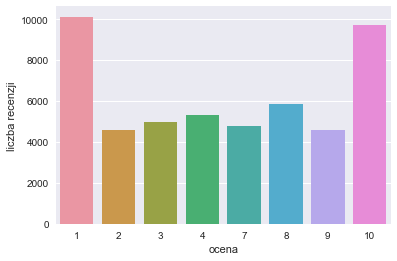

In [6]:
print('all_labelled_data_INFO')
labelled_data.info()
sns_plot = sns.countplot(labelled_data['rating'])
sns_plot.set_xlabel('ocena')
sns_plot.set_ylabel('liczba recenzji')
mc.move_to_plot_location()
sns_plot.get_figure().savefig('all_labelled_data.png')

all_labelled_data_INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
review       50000 non-null object
rating       50000 non-null int64
sentiment    50000 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


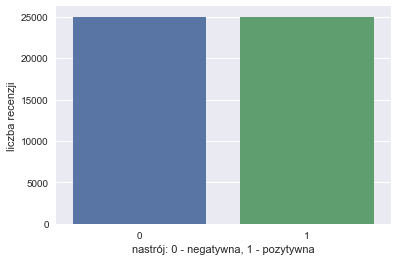

In [36]:
print('all_labelled_data_INFO')
labelled_data.info()
sns_plot = sns.countplot(labelled_data['sentiment'])
#sns_plot = sns.countplot(ywny'],data=labelled_data['sentiment'], hue=['a','b'])
sns_plot.set_xlabel('nastrój: 0 - negatywna, 1 - pozytywna')
sns_plot.set_ylabel('liczba recenzji')
mc.move_to_plot_location()
sns_plot.get_figure().savefig('sentiment_division.png')

### Counting words in reviews to determine common value for size of words in review (used in NN)

In [38]:
words_reviews = prep.preprocessing_reviews_in_df_to_words(labelled_data, 'words_reviews.csv')

.... Writing data to words_reviews.csv ....
.... DONE ....


In [39]:
word_count = [len(review) for review in words_reviews]

In [40]:
word_count

[168,
 128,
 264,
 371,
 230,
 155,
 105,
 287,
 287,
 148,
 403,
 153,
 103,
 192,
 237,
 319,
 126,
 160,
 223,
 498,
 264,
 136,
 124,
 145,
 138,
 129,
 154,
 408,
 306,
 44,
 111,
 147,
 65,
 196,
 174,
 62,
 450,
 205,
 230,
 417,
 185,
 390,
 142,
 205,
 126,
 260,
 225,
 134,
 136,
 119,
 192,
 41,
 217,
 956,
 530,
 121,
 530,
 137,
 123,
 145,
 144,
 281,
 241,
 367,
 124,
 115,
 124,
 47,
 159,
 177,
 102,
 134,
 157,
 141,
 221,
 220,
 296,
 229,
 878,
 48,
 337,
 123,
 121,
 333,
 256,
 92,
 161,
 406,
 134,
 273,
 332,
 131,
 75,
 152,
 193,
 141,
 166,
 277,
 166,
 137,
 166,
 116,
 378,
 131,
 126,
 682,
 183,
 177,
 173,
 78,
 149,
 150,
 157,
 128,
 138,
 183,
 353,
 327,
 610,
 271,
 215,
 343,
 378,
 675,
 276,
 202,
 715,
 179,
 447,
 126,
 94,
 135,
 348,
 96,
 144,
 34,
 123,
 452,
 128,
 207,
 375,
 459,
 156,
 159,
 189,
 158,
 249,
 126,
 443,
 173,
 201,
 146,
 103,
 94,
 241,
 563,
 169,
 340,
 365,
 252,
 42,
 62,
 236,
 126,
 113,
 117,
 325,
 128,
 423,
 

In [42]:
np.mean(word_count)

226.19424000000001

In [44]:
4000/50000


0.08

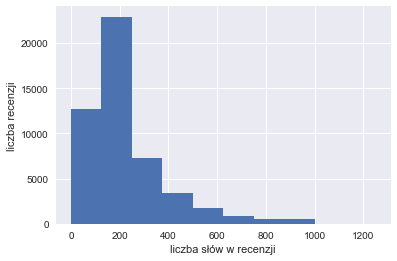

In [41]:
import matplotlib.pyplot as plt
plt.hist(word_count, bins=10, range=[0, 1250])
plt.ylabel('liczba recenzji')
plt.xlabel('liczba słów w recenzji')
mc.move_to_plot_location()
plt.savefig('word_count.png')

## Choosing arbitraly max_sequence_length = 250

In [46]:
max_sequence_length = 250

In [47]:
test_set, train_dev_set = prep.pick_sample(labelled_data, 0.2)



trian_dev_set :
<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 1 to 49999
Data columns (total 3 columns):
review       40000 non-null object
rating       40000 non-null int64
sentiment    40000 non-null int64
dtypes: int64(2), object(1)
memory usage: 2.5+ MB
None


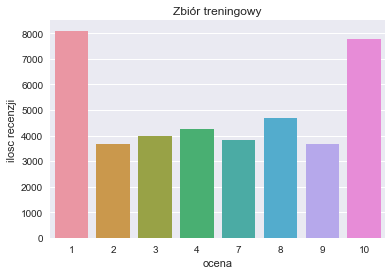

In [49]:
sns.set_color_codes('deep')
print('trian_dev_set :')
print(train_dev_set.info())
sns_plot = sns.countplot(train_dev_set['rating'])
sns_plot.set_title('Zbiór treningowy')
sns_plot.set_xlabel('ocena')
sns_plot.set_ylabel('ilosc recenzji')
mc.move_to_plot_location()
sns_plot.get_figure().savefig('train_dev_set.png')

test_set :
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 49996
Data columns (total 3 columns):
review       10000 non-null object
rating       10000 non-null int64
sentiment    10000 non-null int64
dtypes: int64(2), object(1)
memory usage: 312.5+ KB
None


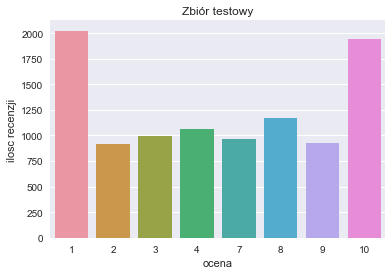

In [50]:
sns.set_color_codes('deep')
print('test_set :')
print(test_set.info())
sns_plot = sns.countplot(test_set['rating'])
sns_plot.set_title('Zbiór testowy')
sns_plot.set_xlabel('ocena')
sns_plot.set_ylabel('ilosc recenzji')
mc.move_to_plot_location()
sns_plot.get_figure().savefig('test_set.png')

## Choosing Metrics depends on class distribution in sets
### Choosing Accuracy

In [58]:
mc.move_to_data_location()
test_set.to_csv('test_set.csv')
train_dev_set.to_csv('train_dev_set.csv')

### Processing train_dev and test sets

In [149]:
train_dev_preprocessed_set = prep.preprocessing_reviews_in_df(train_dev_set, max_sequence_length,filename='train_dev_processed_set')

HBox(children=(IntProgress(value=0, description='processing', max=1), HTML(value='')))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 1 to 49999
Data columns (total 2 columns):
review       40000 non-null object
sentiment    40000 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.2+ MB



C:\Users\Qbit\Inzynierka\myTools\preprocessingData.py:215: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  set_df['review'] = set_df['review'].apply(lambda x: re.sub('[^a-zA-Z1-9\s]', '', x))
Exception in thread Thread-20:
Traceback (most recent call last):
  File "C:\Programy\Anaconda3\envs\SentimentProject\lib\threading.py", line 916, in _bootstrap_inner
    self.run()
  File "C:\Programy\Anaconda3\envs\SentimentProject\lib\site-packages\tqdm\_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "C:\Programy\Anaconda3\envs\SentimentProject\lib\_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

C:\Users\Qbit\Inzynierka\myTools\preprocessingData.py:216: SettingWithCopyWarni

In [154]:
test_preprocessed_set = prep.preprocessing_reviews_in_df(test_set, max_sequence_length, filename='test_processed_set')

HBox(children=(IntProgress(value=0, description='processing', max=1), HTML(value='')))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 49996
Data columns (total 2 columns):
review       10000 non-null object
sentiment    10000 non-null int64
dtypes: int64(1), object(1)
memory usage: 554.4+ KB


C:\Users\Qbit\Inzynierka\myTools\preprocessingData.py:215: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  set_df['review'] = set_df['review'].apply(lambda x: re.sub('[^a-zA-Z1-9\s]', '', x))
C:\Users\Qbit\Inzynierka\myTools\preprocessingData.py:216: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  set_df['review'] = set_df['review'].apply(lambda x: x.lower().split()[:max_seq_length])
C:\Users\Qbit\Inzynierka\myTools\preprocessingData.py:217: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

### Creating indices representations of words based on particular word2Vec model

In [31]:
w2v_model_name = '300f_40minw_10window'

In [32]:
word_list, word_vectors = w2v.load_word_list_and_words_vectors(w2v_model_name)

In [131]:
train_dev_ids_matrix, train_dev_sentiment_labels = w2v.convert_pd_words_reviews_to_np_ids_matrix(train_dev_preprocessed_set, maxSeqLength=max_sequence_length, wordsList=word_list, set_name='train_dev')

HBox(children=(IntProgress(value=0, description='processing review', max=40000), HTML(value='')))

In [157]:
test_ids_matrix, test_sentiment_labels = w2v.convert_pd_words_reviews_to_np_ids_matrix(test_preprocessed_set, maxSeqLength=max_sequence_length, wordsList=word_list,set_name='test')

HBox(children=(IntProgress(value=0, description='processing review', max=10000), HTML(value='')))

In [158]:
test_ids_matrix

array([[   11,     8,   974, ..., 19772, 19772, 19772],
       [   19,   170,   803, ...,   335,     2,   163],
       [  254,     7,    37, ...,  1110,   794,    10],
       ..., 
       [    8,     5,    26, ..., 19772, 19772, 19772],
       [    8, 19772,  2743, ...,    59,     5,     0],
       [    0,    17,    12, ..., 19772, 19772, 19772]])

In [4]:
mc.move_to_data_location()
k = np.load('train_dev_ids_matrix.npy')
print(k)


[[  293     0   923 ..., 19772 19772 19772]
 [  516     7   179 ...,    50  1315     9]
 [   45    21   103 ...,    68     9   114]
 ..., 
 [  390     0   241 ..., 19772 19772 19772]
 [    8 17544  4960 ..., 19772 19772 19772]
 [    2  2554  3960 ...,     6     0    15]]


In [161]:
k1 = np.load('test')

array([[   38,    24,   787, ...,     0,     0,     0],
       [    2, 15107,  1059, ...,    77,   242,  1581],
       [    8,   192,     0, ...,     0,     0,     0],
       ..., 
       [    9,   816,     5, ...,    10,   193,    60],
       [    5,     6,    41, ...,     0,     0,     0],
       [  424,    59,    73, ...,     7,    25,   599]])

In [5]:
word_list


['the',
 'and',
 'a',
 'of',
 'to',
 'is',
 'in',
 'it',
 'this',
 'i',
 'that',
 'was',
 'as',
 'with',
 'for',
 'movie',
 'but',
 'film',
 'on',
 'you',
 'not',
 'are',
 'his',
 'have',
 'be',
 'he',
 'one',
 'its',
 'at',
 'all',
 'by',
 'an',
 'they',
 'who',
 'from',
 'like',
 'so',
 'or',
 'just',
 'her',
 'about',
 'has',
 'out',
 'if',
 'some',
 'there',
 'what',
 'good',
 'more',
 'when',
 'very',
 'up',
 'no',
 'even',
 'would',
 'she',
 'my',
 'their',
 'time',
 'which',
 'only',
 'really',
 'see',
 'were',
 'story',
 'can',
 'had',
 'me',
 'than',
 'much',
 'we',
 'well',
 'been',
 'get',
 'into',
 'bad',
 'will',
 'great',
 'do',
 'other',
 'also',
 'people',
 'because',
 'how',
 'most',
 'him',
 'first',
 'dont',
 'them',
 'films',
 'make',
 'movies',
 'made',
 'then',
 'could',
 'way',
 'too',
 'any',
 'characters',
 'after',
 'think',
 'watch',
 'being',
 'many',
 'two',
 'character',
 'never',
 'seen',
 'where',
 'love',
 'little',
 'plot',
 'best',
 'acting',
 'did',


In [6]:
word_vectors

array([[ 0.03848993,  0.05548434, -0.12621312, ...,  0.02984369,
        -0.04017715, -0.01362713],
       [-0.00954286, -0.06148256,  0.01136692, ...,  0.03650177,
         0.02104755, -0.05544578],
       [ 0.05775741,  0.06397925,  0.04221187, ...,  0.02807069,
        -0.01054168, -0.00874834],
       ..., 
       [-0.01743258, -0.01323049, -0.10944191, ...,  0.05106229,
        -0.07280528, -0.05455171],
       [-0.00738839, -0.03082523, -0.059892  , ...,  0.15005714,
        -0.03606867,  0.03849318],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [7]:
os.getcwd()

'C:\\Users\\Qbit\\Inzynierka\\Models\\Word2Vec'

In [64]:
def write_list_of_lists_to_csv(ll, filename):
	print('.... Writing data to %s ....' % filename)
	with open(filename, 'w', newline='') as f:
		writer = csv.writer(f, delimiter = ' ')
		writer.writerows(ll)
	print('.... DONE ....')

In [65]:
write_list_of_lists_to_csv(word_vectors, 'word_vectors.csv')

.... Writing data to word_vectors.csv ....
.... DONE ....


In [9]:
prep.write_list_of_lists_to_csv(word_list, 'word_list.csv')

.... Writing data to word_list.csv ....
.... DONE ....


In [12]:
import csv

In [56]:
def write_list_to_csv(ll, filename):
    print('.... Writing data to %s ....' % filename)
    with open(filename, 'w', newline='') as f:
        writer = csv.writer(f, delimiter=',' )
        for word in ll:
            writer.writerow([word])
    print('.... DONE ....')

In [57]:
write_list_to_csv(word_list, 'word_list.csv')

.... Writing data to word_list.csv ....
.... DONE ....


In [15]:
word_list = [word_list]

In [33]:
word_list

['the',
 'and',
 'a',
 'of',
 'to',
 'is',
 'in',
 'it',
 'this',
 'i',
 'that',
 'was',
 'as',
 'with',
 'for',
 'movie',
 'but',
 'film',
 'on',
 'you',
 'not',
 'are',
 'his',
 'have',
 'be',
 'he',
 'one',
 'its',
 'at',
 'all',
 'by',
 'an',
 'they',
 'who',
 'from',
 'like',
 'so',
 'or',
 'just',
 'her',
 'about',
 'has',
 'out',
 'if',
 'some',
 'there',
 'what',
 'good',
 'more',
 'when',
 'very',
 'up',
 'no',
 'even',
 'would',
 'she',
 'my',
 'their',
 'time',
 'which',
 'only',
 'really',
 'see',
 'were',
 'story',
 'can',
 'had',
 'me',
 'than',
 'much',
 'we',
 'well',
 'been',
 'get',
 'into',
 'bad',
 'will',
 'great',
 'do',
 'other',
 'also',
 'people',
 'because',
 'how',
 'most',
 'him',
 'first',
 'dont',
 'them',
 'films',
 'make',
 'movies',
 'made',
 'then',
 'could',
 'way',
 'too',
 'any',
 'characters',
 'after',
 'think',
 'watch',
 'being',
 'many',
 'two',
 'character',
 'never',
 'seen',
 'where',
 'love',
 'little',
 'plot',
 'best',
 'acting',
 'did',


In [58]:
len(word_list)

19772

In [63]:
len(word_vectors[0])

300

In [27]:
write_list_to_csv(word_list, 'word_list.csv')

.... Writing data to word_list.csv ....
.... DONE ....


In [26]:

word_list

['the',
 'and',
 'a',
 'of',
 'to',
 'is',
 'in',
 'it',
 'this',
 'i',
 'that',
 'was',
 'as',
 'with',
 'for',
 'movie',
 'but',
 'film',
 'on',
 'you',
 'not',
 'are',
 'his',
 'have',
 'be',
 'he',
 'one',
 'its',
 'at',
 'all',
 'by',
 'an',
 'they',
 'who',
 'from',
 'like',
 'so',
 'or',
 'just',
 'her',
 'about',
 'has',
 'out',
 'if',
 'some',
 'there',
 'what',
 'good',
 'more',
 'when',
 'very',
 'up',
 'no',
 'even',
 'would',
 'she',
 'my',
 'their',
 'time',
 'which',
 'only',
 'really',
 'see',
 'were',
 'story',
 'can',
 'had',
 'me',
 'than',
 'much',
 'we',
 'well',
 'been',
 'get',
 'into',
 'bad',
 'will',
 'great',
 'do',
 'other',
 'also',
 'people',
 'because',
 'how',
 'most',
 'him',
 'first',
 'dont',
 'them',
 'films',
 'make',
 'movies',
 'made',
 'then',
 'could',
 'way',
 'too',
 'any',
 'characters',
 'after',
 'think',
 'watch',
 'being',
 'many',
 'two',
 'character',
 'never',
 'seen',
 'where',
 'love',
 'little',
 'plot',
 'best',
 'acting',
 'did',


In [34]:
word_vectors

array([[ 0.03848993,  0.05548434, -0.12621312, ...,  0.02984369,
        -0.04017715, -0.01362713],
       [-0.00954286, -0.06148256,  0.01136692, ...,  0.03650177,
         0.02104755, -0.05544578],
       [ 0.05775741,  0.06397925,  0.04221187, ...,  0.02807069,
        -0.01054168, -0.00874834],
       ..., 
       [-0.01743258, -0.01323049, -0.10944191, ...,  0.05106229,
        -0.07280528, -0.05455171],
       [-0.00738839, -0.03082523, -0.059892  , ...,  0.15005714,
        -0.03606867,  0.03849318],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [1]:
word_vectors[0][0]

NameError: name 'word_vectors' is not defined

In [44]:
flat_words_vectors = [item for sublist in word_vectors for item in sublist]

In [45]:
flat_words_vectors

[0.038489934056997299,
 0.055484335869550705,
 -0.12621311843395233,
 -0.058993902057409286,
 0.030045915395021439,
 -0.072855755686759949,
 -0.053067646920681,
 -0.010978823527693748,
 0.060141436755657196,
 -0.0071370797231793404,
 0.092637799680233002,
 -0.020577665418386459,
 -0.011314522475004196,
 -0.10041731595993042,
 -0.095067143440246582,
 -0.074448458850383759,
 -0.021035376936197281,
 -0.10704190284013748,
 0.057366769760847092,
 0.11113723367452621,
 0.030740655958652496,
 0.09482438862323761,
 -0.021418366581201553,
 0.045595388859510422,
 0.00058115215506404638,
 -0.0017902345862239599,
 0.07167515903711319,
 0.021261632442474365,
 0.090381920337677002,
 -0.047457139939069748,
 0.014877711422741413,
 0.0014707862865179777,
 -0.088233470916748047,
 -0.02772865816950798,
 -0.017435288056731224,
 -0.091841578483581543,
 -0.077704757452011108,
 -0.041072092950344086,
 0.10495442897081375,
 -0.042535446584224701,
 -0.069738700985908508,
 0.033776819705963135,
 0.0310290139168

In [47]:
import _pickle as cPickle

In [48]:
data_dat = open("data6.dat", "wb")

In [49]:
tsne_parameters = [1000, 300, 0.5, 50, 3, 1000]

In [50]:
tsne_parameters

[1000, 300, 0.5, 50, 3, 1000]

In [51]:
parameters_array = tsne_parameters + flat_words_vectors

In [52]:
parameters_array

[1000,
 300,
 0.5,
 50,
 3,
 1000,
 0.038489934056997299,
 0.055484335869550705,
 -0.12621311843395233,
 -0.058993902057409286,
 0.030045915395021439,
 -0.072855755686759949,
 -0.053067646920681,
 -0.010978823527693748,
 0.060141436755657196,
 -0.0071370797231793404,
 0.092637799680233002,
 -0.020577665418386459,
 -0.011314522475004196,
 -0.10041731595993042,
 -0.095067143440246582,
 -0.074448458850383759,
 -0.021035376936197281,
 -0.10704190284013748,
 0.057366769760847092,
 0.11113723367452621,
 0.030740655958652496,
 0.09482438862323761,
 -0.021418366581201553,
 0.045595388859510422,
 0.00058115215506404638,
 -0.0017902345862239599,
 0.07167515903711319,
 0.021261632442474365,
 0.090381920337677002,
 -0.047457139939069748,
 0.014877711422741413,
 0.0014707862865179777,
 -0.088233470916748047,
 -0.02772865816950798,
 -0.017435288056731224,
 -0.091841578483581543,
 -0.077704757452011108,
 -0.041072092950344086,
 0.10495442897081375,
 -0.042535446584224701,
 -0.069738700985908508,
 0.0

In [53]:
cPickle.dump(parameters_array, data_dat)

In [54]:
data_dat = open("data6.dat", "rb")

In [55]:
array = cPickle.load(data_dat)

In [56]:
array

[1000,
 300,
 0.5,
 50,
 3,
 1000,
 0.038489934056997299,
 0.055484335869550705,
 -0.12621311843395233,
 -0.058993902057409286,
 0.030045915395021439,
 -0.072855755686759949,
 -0.053067646920681,
 -0.010978823527693748,
 0.060141436755657196,
 -0.0071370797231793404,
 0.092637799680233002,
 -0.020577665418386459,
 -0.011314522475004196,
 -0.10041731595993042,
 -0.095067143440246582,
 -0.074448458850383759,
 -0.021035376936197281,
 -0.10704190284013748,
 0.057366769760847092,
 0.11113723367452621,
 0.030740655958652496,
 0.09482438862323761,
 -0.021418366581201553,
 0.045595388859510422,
 0.00058115215506404638,
 -0.0017902345862239599,
 0.07167515903711319,
 0.021261632442474365,
 0.090381920337677002,
 -0.047457139939069748,
 0.014877711422741413,
 0.0014707862865179777,
 -0.088233470916748047,
 -0.02772865816950798,
 -0.017435288056731224,
 -0.091841578483581543,
 -0.077704757452011108,
 -0.041072092950344086,
 0.10495442897081375,
 -0.042535446584224701,
 -0.069738700985908508,
 0.0

In [75]:
len(array)

5931906

In [57]:
data_dat.close()

In [74]:
sys.getsizeof(array[6])

32

In [76]:
os.getcwd()

'C:\\Users\\Qbit\\Inzynierka\\Models\\Word2Vec'

In [89]:
result = open("result.dat", "r+b")

In [91]:
array = cPickle.load(result)

UnpicklingError: could not find MARK

In [92]:
word_list

['the',
 'and',
 'a',
 'of',
 'to',
 'is',
 'in',
 'it',
 'this',
 'i',
 'that',
 'was',
 'as',
 'with',
 'for',
 'movie',
 'but',
 'film',
 'on',
 'you',
 'not',
 'are',
 'his',
 'have',
 'be',
 'he',
 'one',
 'its',
 'at',
 'all',
 'by',
 'an',
 'they',
 'who',
 'from',
 'like',
 'so',
 'or',
 'just',
 'her',
 'about',
 'has',
 'out',
 'if',
 'some',
 'there',
 'what',
 'good',
 'more',
 'when',
 'very',
 'up',
 'no',
 'even',
 'would',
 'she',
 'my',
 'their',
 'time',
 'which',
 'only',
 'really',
 'see',
 'were',
 'story',
 'can',
 'had',
 'me',
 'than',
 'much',
 'we',
 'well',
 'been',
 'get',
 'into',
 'bad',
 'will',
 'great',
 'do',
 'other',
 'also',
 'people',
 'because',
 'how',
 'most',
 'him',
 'first',
 'dont',
 'them',
 'films',
 'make',
 'movies',
 'made',
 'then',
 'could',
 'way',
 'too',
 'any',
 'characters',
 'after',
 'think',
 'watch',
 'being',
 'many',
 'two',
 'character',
 'never',
 'seen',
 'where',
 'love',
 'little',
 'plot',
 'best',
 'acting',
 'did',
